# Salpeter & Friends

Sample N stars from Salpeter, Kroupa and Chabrier initial mass function using rejection sampling or inverse transform sampling.

- Salpeter IMF (1955)
$$
\xi(m) \propto m^{-\alpha}, \quad \alpha = 2.35 \quad \text{for } m \geq 0.1\,M_\odot
$$

- Kroupa IMF (2001)
$$
\xi(m) \propto 
\begin{cases}
m^{-0.3}, & 0.01 < m \leq 0.08\,M_\odot \\
m^{-1.3}, & 0.08 < m \leq 0.5\,M_\odot \\
m^{-2.3}, & m > 0.5\,M_\odot
\end{cases}
$$

- Chabrier IMF (2003)
$$
\xi(m) \propto 
\begin{cases}
\exp\left[ -\frac{(\log_{10} m - \log_{10} 0.22)^2}{2 \cdot 0.57^2} \right], & m \leq 1\,M_\odot \\
m^{-2.3}, & m > 1\,M_\odot
\end{cases}
$$

In [3]:
import numpy as np
import matplotlib.pyplot as plt
#import random

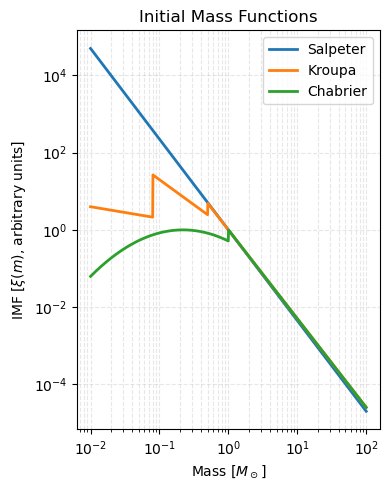

In [24]:
def salpeter_imf(m, alpha=2.35):
    return m**(-alpha)

def kroupa_imf(m):
    m = np.atleast_1d(m)
    alpha = np.where(m > 0.5, -2.3,
             np.where(m > 0.08, -1.3,
             -0.3))
    #m0 = np.where(m>0.1,0.5,0.08)
    imf = m**alpha 
    return imf

def chabrier_imf(m):
    m = np.atleast_1d(m)
    imf = np.zeros_like(m)
    logm = np.log10(m[m <= 1])
    imf[m <= 1] = np.exp(-(logm - np.log10(0.22))**2 / (2 * 0.57**2))
    imf[m > 1] = m[m > 1]**(-2.3)
    return imf

# Mass range
m = np.logspace(-2, 2, 1000)  # from 0.01 to 100 solar masses

# Plotting
fig, ax = plt.subplots(figsize=(4, 5))

ax.plot(m, salpeter_imf(m), label="Salpeter", lw=2)
ax.plot(m, kroupa_imf(m), label="Kroupa", lw=2)
ax.plot(m, chabrier_imf(m), label="Chabrier", lw=2)

ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlabel("Mass [$M_\\odot$]")
ax.set_ylabel("IMF [$\\xi(m)$, arbitrary units]")
ax.set_title("Initial Mass Functions")
ax.legend()
ax.grid(True, which="both", ls="--", alpha=0.3)

plt.tight_layout()
plt.show()

In [8]:
# analytic distribution function, easily integrable and invertible
def inverse_integral_salpeter(F,alpha=2.35):
    # F is the normalized integral and ranges in [0,1]
    normalization = 1/(alpha-1) * 0.1 ** -(alpha-1)
    m = ( 0.1** - (alpha-1) - 1.35*normalization*F)**(-1/(alpha-1))
    return m

def salpeter_inverse_sampler(N):
    F = np.random.rand(N)  
    m = inverse_integral_salpeter(F)
    return m

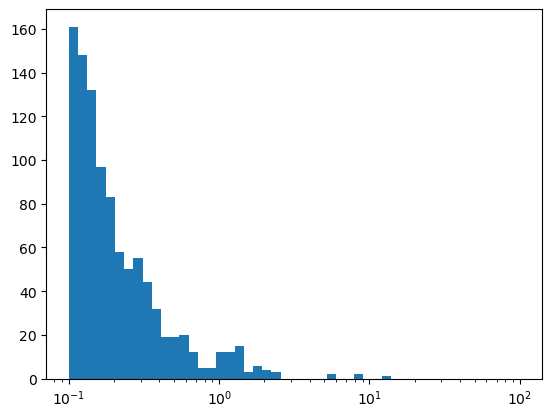

In [7]:

m = salpeter_inverse_sampler(1000)

plt.hist(m,bins=np.logspace(-1,2,50))
plt.xscale('log')
